In [147]:
#Importing the basic librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Importing the ML librarires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [148]:
#Load your dataset and load some dataset
data = pd.read_csv('Student_Data.csv')
data.head()
data=data.drop('id',axis=1)

In [88]:
data.tail()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,Female,27,Surat,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,Male,27,Ludhiana,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,Male,31,Faridabad,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,Female,18,Ludhiana,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1
27900,Male,27,Patna,Student,4,0,9.24,1,0,Less than 5 hours,Healthy,BCA,Yes,2,3.0,Yes,1


In [54]:
data.shape

(27901, 17)

In [89]:
data.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  int64  
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [149]:
data.isna().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


In [150]:
data.dropna(inplace=True)


In [151]:
data.corr(numeric_only=True,method='pearson')

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075854,0.002015,0.005074,0.009239,-0.000431,-0.033000,-0.095026,-0.226511
Academic Pressure,-0.075854,1.000000,-0.022233,-0.022252,-0.111086,-0.024948,0.096053,0.151706,0.474793
Work Pressure,0.002015,-0.022233,1.000000,-0.050899,-0.021148,0.770652,-0.005467,0.001883,-0.003351
CGPA,0.005074,-0.022252,-0.050899,1.000000,-0.044167,-0.053635,0.002638,0.005885,0.022268
Study Satisfaction,0.009239,-0.111086,-0.021148,-0.044167,1.000000,-0.021910,-0.036356,-0.065107,-0.168010
Job Satisfaction,-0.000431,-0.024948,0.770652,-0.053635,-0.021910,1.000000,-0.005221,0.005248,-0.003483
Work/Study Hours,-0.033000,0.096053,-0.005467,0.002638,-0.036356,-0.005221,1.000000,0.075283,0.208627
Financial Stress,-0.095026,0.151706,0.001883,0.005885,-0.065107,0.005248,0.075283,1.000000,0.363591
Depression,-0.226511,0.474793,-0.003351,0.022268,-0.168010,-0.003483,0.208627,0.363591,1.000000


In [127]:
#data[['Academic Pressure','Work/Study Hours','Financial Stress']]

,Academic Pressure,Work/Study Hours,Financial Stress
0,5,3,1.0
1,2,3,2.0
2,3,9,1.0
3,3,4,5.0
4,4,1,1.0
...,...,...,...
27896,5,7,1.0
27897,2,0,3.0
27898,3,12,2.0
27899,5,10,5.0


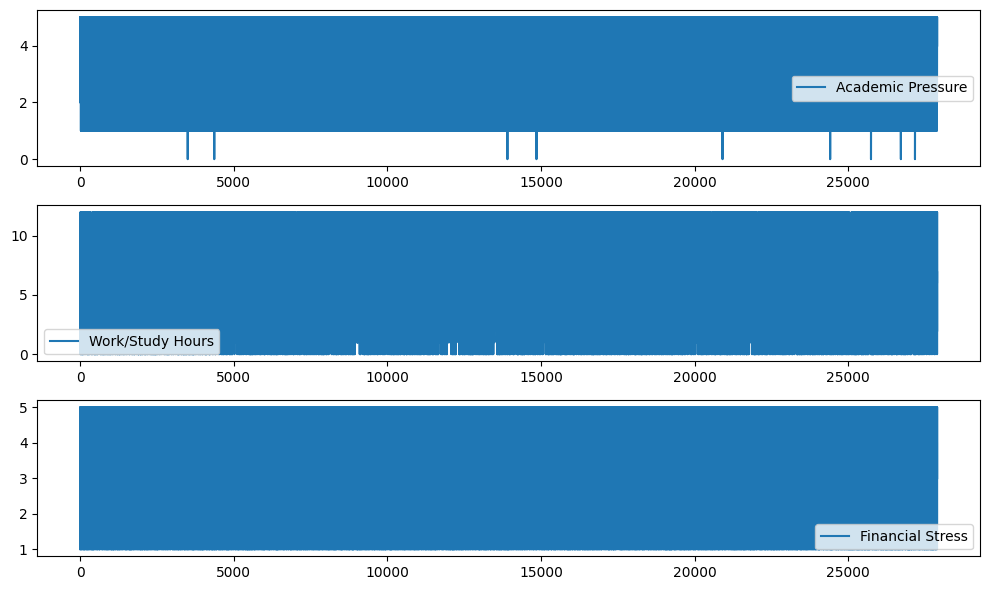

In [152]:
# Create a line plot for each variable
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(data.index,data['Academic Pressure'], label='Academic Pressure')
plt.legend()
plt.subplot(3,1,2)
plt.plot(data.index,data['Work/Study Hours'], label='Work/Study Hours')
plt.legend()
plt.subplot(3,1,3)
plt.plot(data.index,data['Financial Stress'], label='Financial Stress')
plt.legend()
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>,
        <Axes: title={'center': 'Work Pressure'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>,
        <Axes: title={'center': 'Job Satisfaction'}>],
       [<Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Financial Stress'}>,
        <Axes: title={'center': 'Depression'}>]], dtype=object)

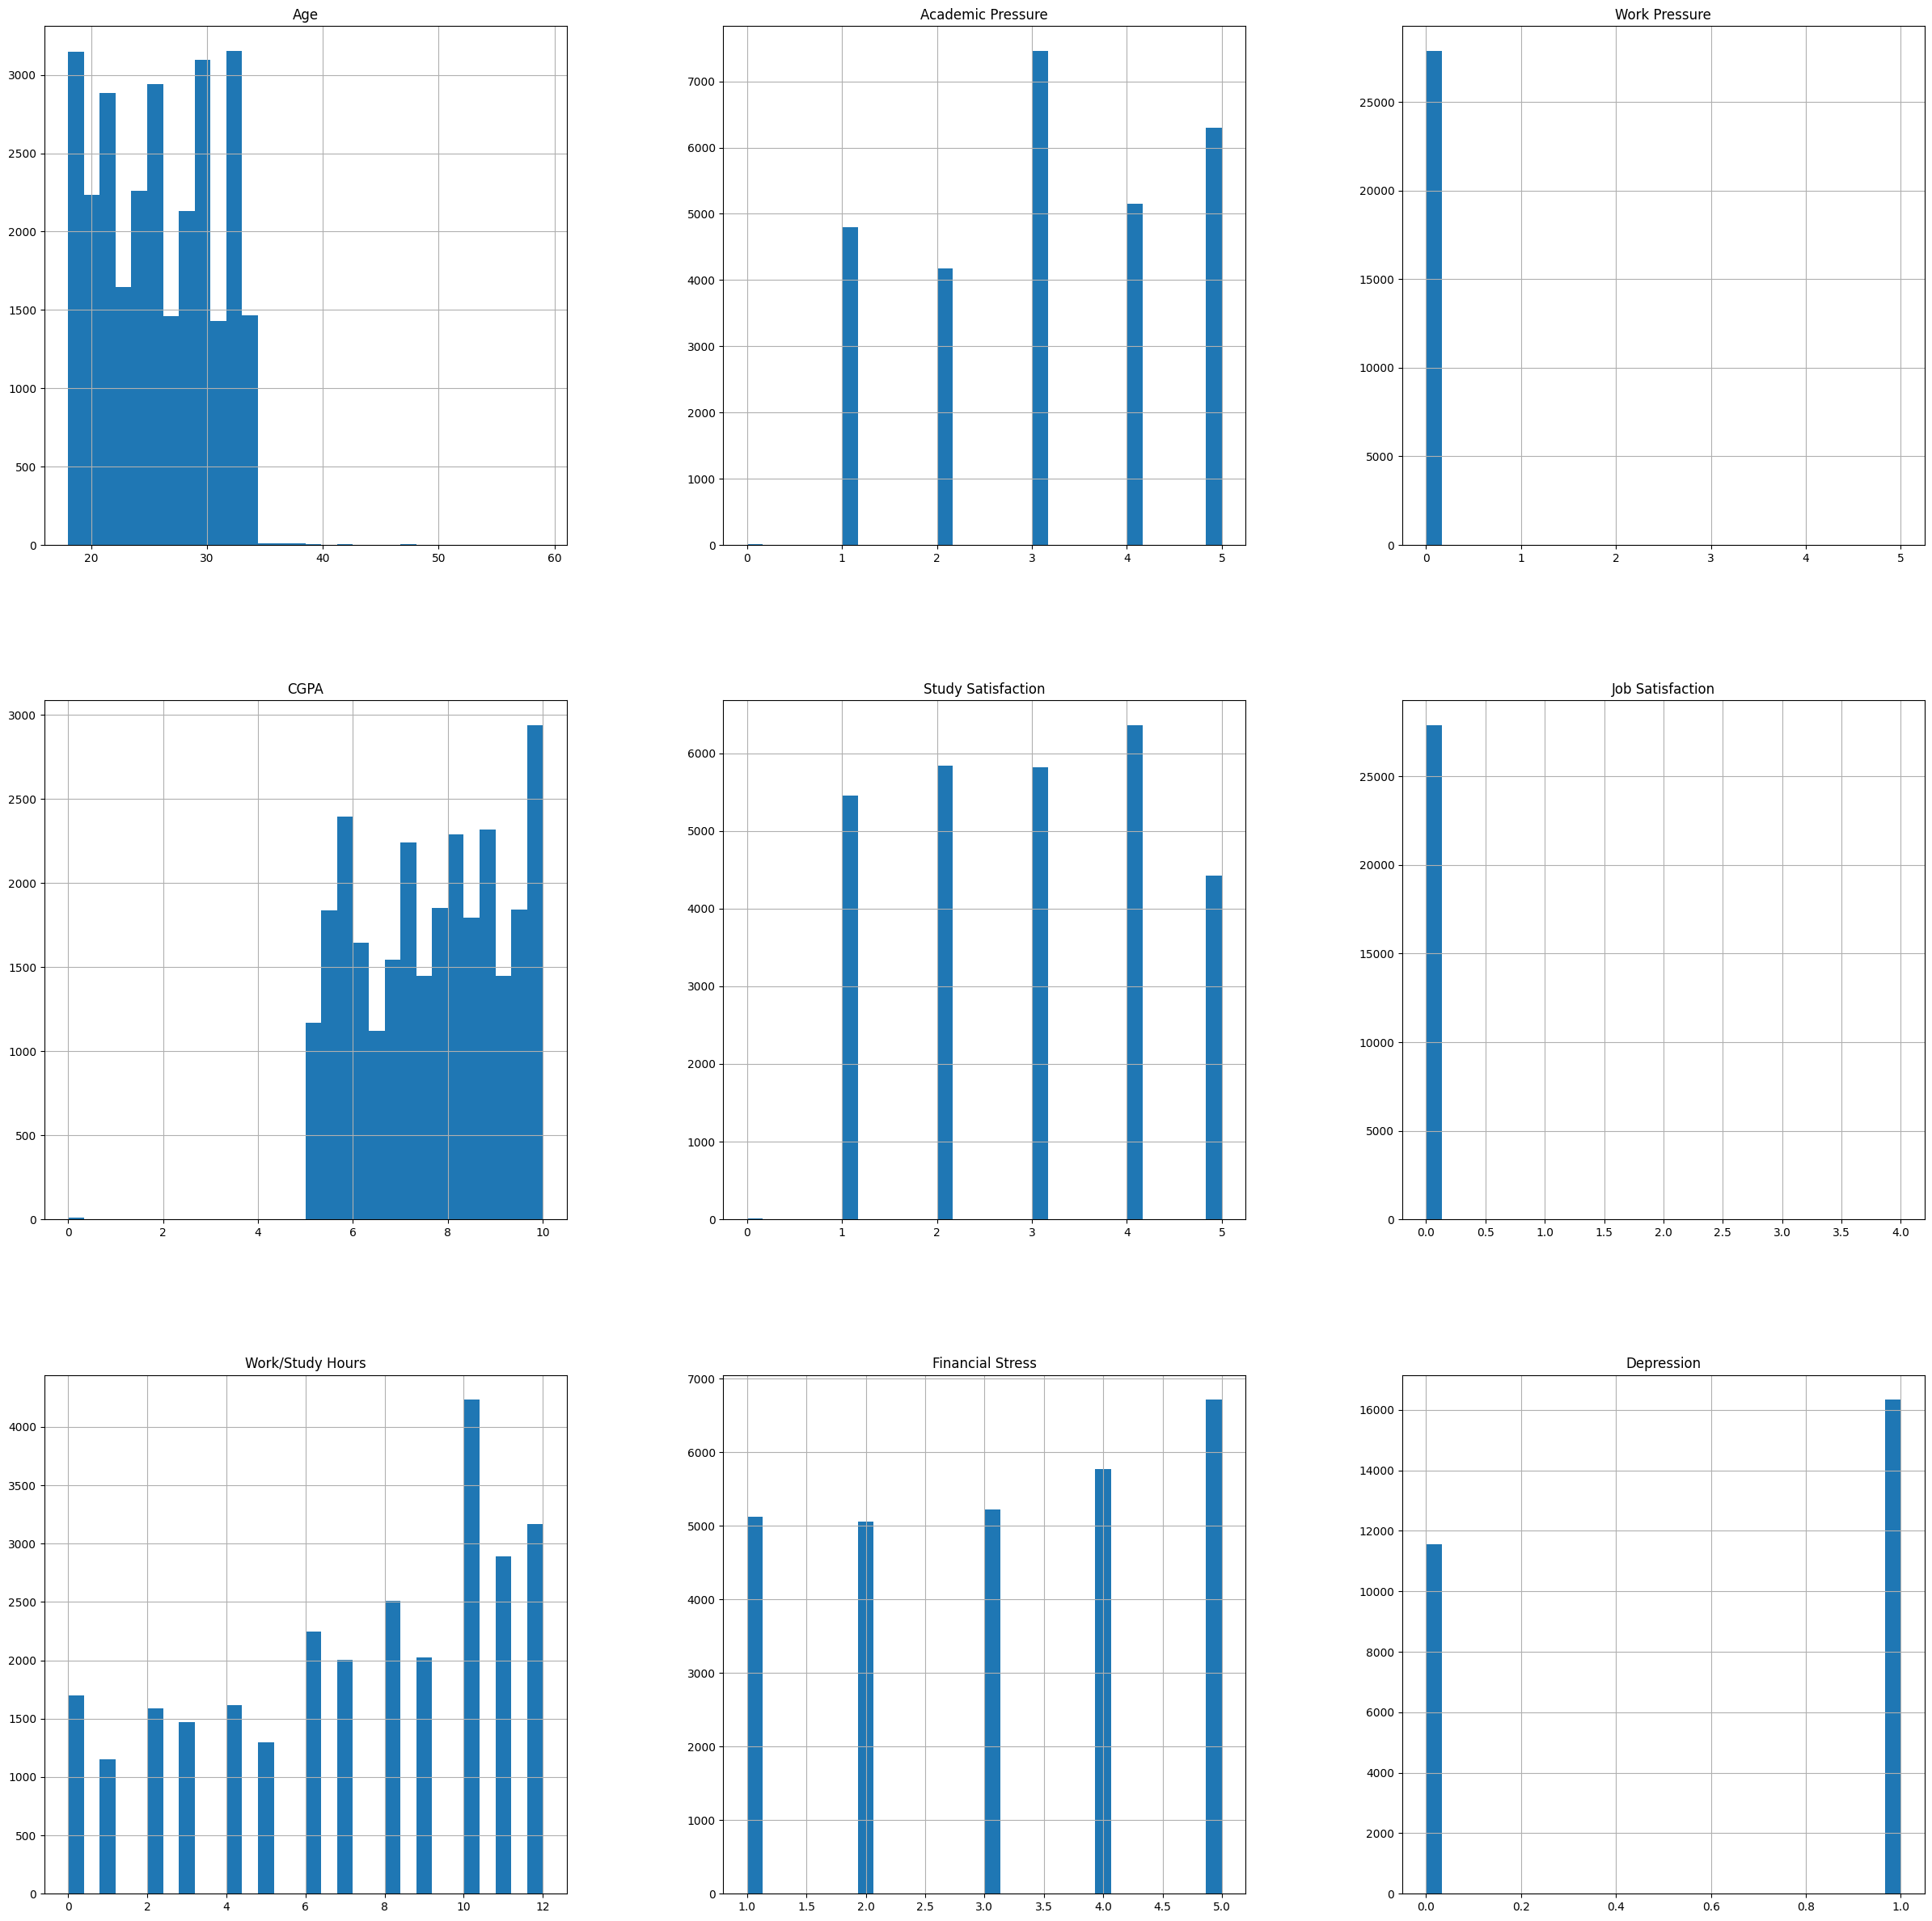

In [153]:
data.hist(bins=30,figsize=(30,30))


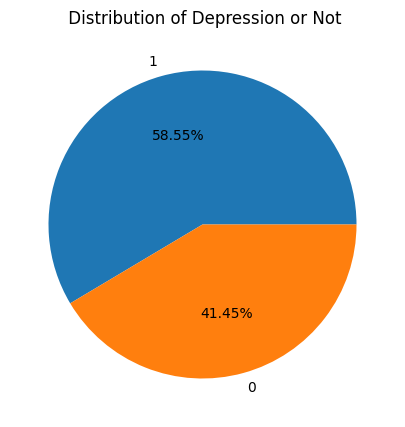

In [154]:
#create a pie chart to visualize the distribution of the "Depression" variable in your dataset.
plt.figure(figsize=(10,5))
plt.pie(data['Depression'].value_counts(),labels=data['Depression'].value_counts().index,autopct='%1.2f%%')
plt.title(' Distribution of Depression or Not')
plt.show()

<Axes: >

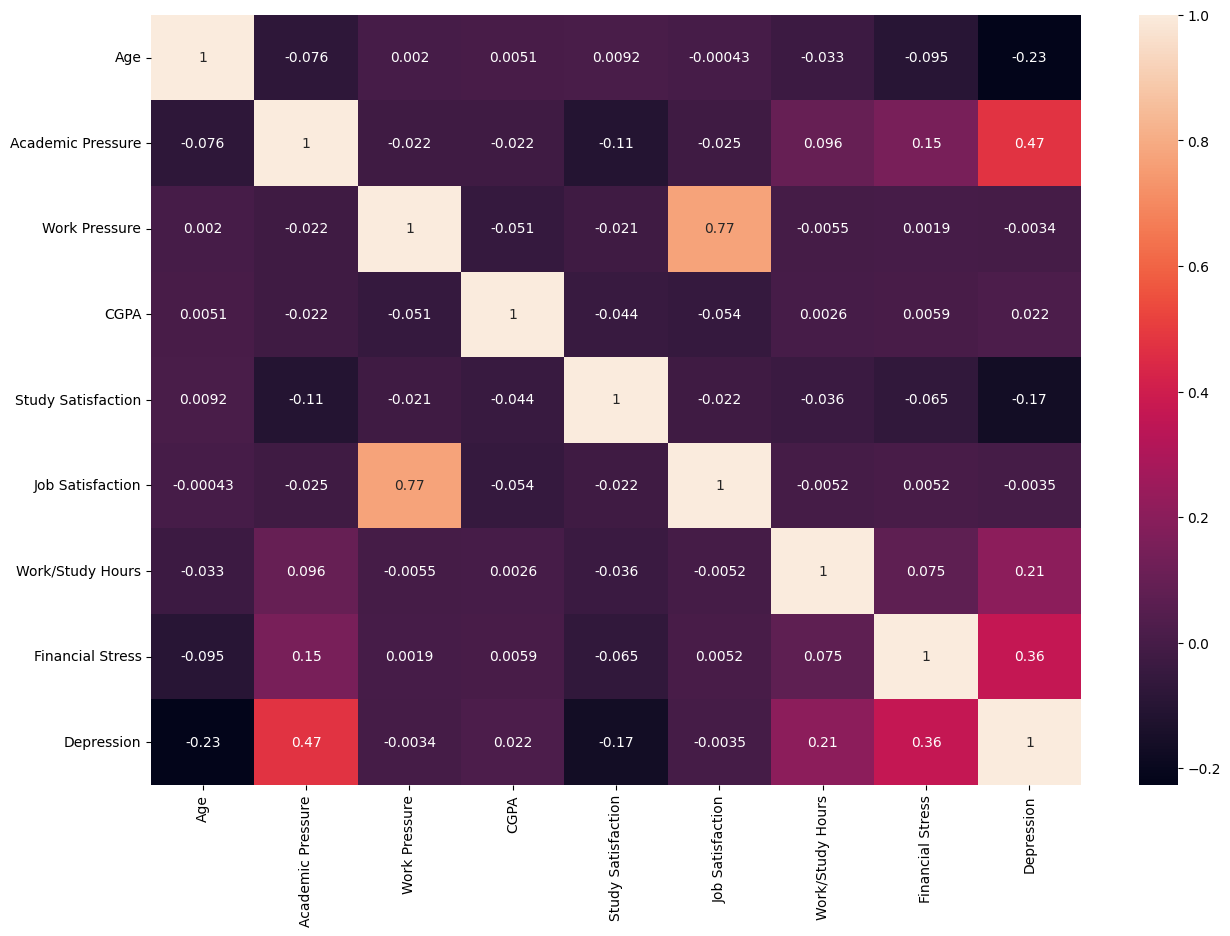

In [155]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True,method='pearson'),annot=True)

In [156]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [162]:
# Split the data into features (X) and the target variable (y)
data=data.select_dtypes(include=['number'])
X=data.drop('Depression',axis=1)
X.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,33,5,0,8.97,2,0,3,1.0
1,24,2,0,5.90,5,0,3,2.0
2,31,3,0,7.03,5,0,9,1.0
3,28,3,0,5.59,2,0,4,5.0
4,25,4,0,8.13,3,0,1,1.0


In [163]:
y = data.Depression
y.head()

,Depression
0,1
1,0
2,0
3,1
4,0


In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [165]:
X_train

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
26049,34,2,0,8.17,4,0,9,1.0
20528,23,5,0,5.74,2,0,10,3.0
15399,25,3,0,9.63,4,0,11,4.0
15001,20,1,0,5.57,1,0,0,1.0
24417,30,0,0,5.47,2,0,5,1.0
...,...,...,...,...,...,...,...,...
21578,25,2,0,5.74,3,0,8,2.0
5391,23,5,0,5.32,1,0,10,5.0
860,18,5,0,6.37,3,0,6,5.0
15797,29,2,0,8.81,2,0,10,5.0


In [166]:
X_test

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
16479,27,2,0,8.01,5,0,5,5.0
19518,19,5,0,6.50,3,0,9,1.0
27260,19,3,0,5.74,3,0,2,3.0
8318,26,5,0,5.16,1,0,12,5.0
9889,24,2,0,8.44,3,0,11,1.0
...,...,...,...,...,...,...,...,...
9673,33,5,0,6.78,1,0,8,1.0
23,23,1,0,8.59,4,0,11,3.0
21669,31,2,0,9.46,5,0,11,4.0
22956,28,4,0,7.24,1,0,2,3.0


In [167]:
# Make predictions on the test data
y_pred = model_log.predict(X_test)

In [109]:
confusion_matrix(y_test,y_pred)

array([[1530,  818],
       [ 488, 2744]])

In [168]:
# Evaluate the model
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, model_log.predict_proba(X_test)[:, 1])*100
classification = classification_report(y_test,y_pred)

In [169]:
# Print the results
print(f'Precision: {precision:}')
print(f'Recall: {recall:}')
print(f'ROC AUC: {roc_auc:}')
print(f'classification: {classification:}')

Precision: 79.33621933621934
Recall: 85.05569306930693
ROC AUC: 85.9382379358038
classification:               precision    recall  f1-score   support

           0       0.77      0.70      0.73      2348
           1       0.79      0.85      0.82      3232

    accuracy                           0.79      5580
   macro avg       0.78      0.77      0.78      5580
weighted avg       0.78      0.79      0.78      5580



In [170]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 78.51
